In [370]:
import numpy as np
import matplotlib.pyplot as plt
from mystery_func import get_mystery_function, get_actual_minimum

In [371]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [372]:
mystery_func, _ = get_mystery_function()

We want to minimize our mystery function, but we can't graph it. So how do we do this?

Let's try some random values

In [373]:
guesses = []
our_minimum = None
for _ in range(10):
    x = float(input("Enter a guess: "))
    current_val = mystery_func(x)
    print(f'{current_val:e}')
    guesses.append(x)
    if not our_minimum or current_val < our_minimum:
        our_minimum = current_val
our_minimum

Enter a guess: 50
3.827300e+04
Enter a guess: -50
3.586673e+06
Enter a guess: 1000
2.546060e+08
Enter a guess: 80
1.008530e+05
Enter a guess: 25
3.834980e+05
Enter a guess: 33
2.337220e+05
Enter a guess: 19
5.201060e+05
Enter a guess: 40
1.330130e+05
Enter a guess: 67
9.866000e+03
Enter a guess: 88
2.053970e+05


9866.0

Let's see how we did:

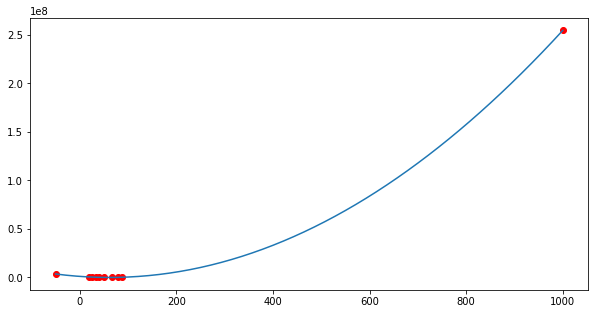

In [374]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.scatter(guesses, [mystery_func(guess) for guess in guesses], color = 'r')
x = np.linspace(np.min(guesses), np.max(guesses))
ax.plot(x, mystery_func(x))

In [375]:
our_minimum

9866.0

In [377]:
actual_min, x_min = get_actual_minimum(mystery_func)

Minimum of 7.74e+02 at x = 61.39


(-226.1833910034601, 100773.81660899654)

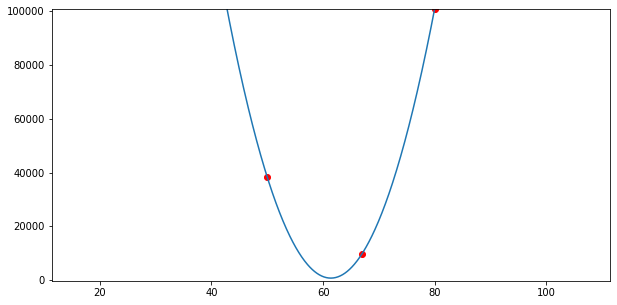

In [385]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.scatter(guesses, [mystery_func(guess) for guess in guesses], color = 'r')
x = np.linspace(np.min(guesses), np.max(guesses), 10000)
ax.plot(x, mystery_func(x))
ax.set_xlim(x_min - 50, x_min + 50)
ax.set_ylim(actual_min-1000, actual_min + 100000)

Maybe we can have our computer check a bunch of values to find the minimum

In [409]:
def random_search(mystery_func, n_guesses):
    guesses = []
    best_guess = None
    for _ in range(n_guesses):
        current_guess = np.random.randint(-1e4, 1e4)
        guesses.append(current_guess)
        current_result = mystery_func(current_guess)
        if not best_guess or current_result < best_result:
            best_guess, best_result = current_guess, current_result
    
    print(f"Our minimum was {best_result} from our guess x = {best_guess}")
    return guesses

In [413]:
guesses = random_search(mystery_func, 1000)

Our minimum was 13397 from our guess x = 68


In [414]:
get_actual_minimum(mystery_func)

Minimum of 7.74e+02 at x = 61.39


(773.8166089965399, 61.391003446301916)

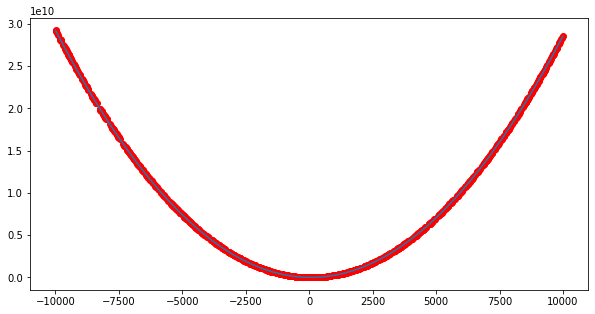

In [415]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.scatter(guesses, [mystery_func(guess) for guess in guesses], color = 'r')
x = np.linspace(np.min(guesses), np.max(guesses))
ax.plot(x, mystery_func(x))

(-9226.18339100346, 100773.81660899654)

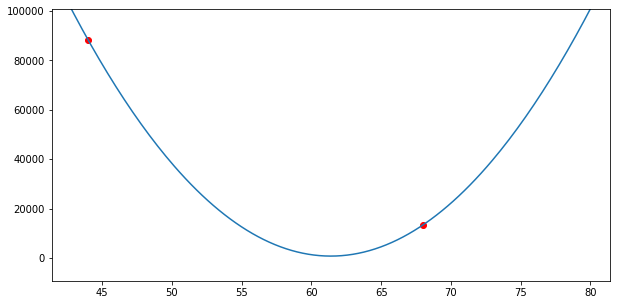

In [419]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.scatter(guesses, [mystery_func(guess) for guess in guesses], color = 'r')
x = np.linspace(np.min(guesses), np.max(guesses), 100000)
ax.plot(x, mystery_func(x))
ax.set_xlim(x_min - 20, x_min + 20)
ax.set_ylim(actual_min-10000, actual_min + 100000)

Okay, this isn't getting us very far, but we actually have a secret weapon I didn't mention, we can also evaluate the derivative of our mystery function. How about we try a random value and evaluate the function and the derivative at that point.

Let's try a new mystery function

In [420]:
mystery_func, mystery_func_prime = get_mystery_function()

In [421]:
guesses = []
our_minimum = None
for _ in range(10):
    x = int(input("Enter a guess: "))
    current_val = mystery_func(x)
    current_derivative = mystery_func_prime(x)
    print(f'Current value: {current_val:e}, current derivative: {current_derivative:e}')
    guesses.append(x)
    if not our_minimum or current_val < our_minimum:
        our_minimum = current_val
our_minimum

Enter a guess: 100
Current value: 6.126330e+06, current derivative: -4.454300e+04
Enter a guess: 10000
Current value: 7.503961e+09, current derivative: 1.559257e+06
Enter a guess: 3000
Current value: 5.581616e+08, current derivative: 4.252570e+05
Enter a guess: 1000
Current value: 3.164763e+07, current derivative: 1.012570e+05
Enter a guess: 500
Current value: 1.269130e+06, current derivative: 2.025700e+04
Enter a guess: 200
Current value: 2.482030e+06, current derivative: -2.834300e+04
Enter a guess: 350
Current value: 5.308000e+04, current derivative: -4.043000e+03
Enter a guess: 400
Current value: 5.343000e+04, current derivative: 4.057000e+03
Enter a guess: 375
Current value: 2.630000e+03, current derivative: 7.000000e+00
Enter a guess: 374
Current value: 2.704000e+03, current derivative: -1.550000e+02


2630

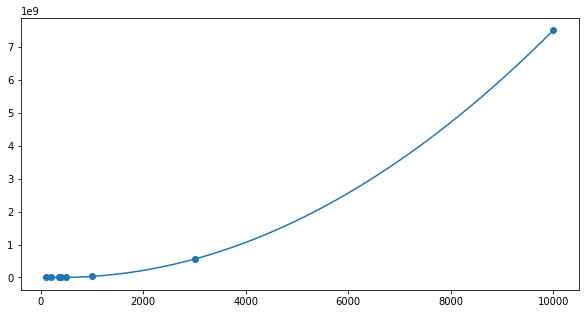

In [422]:
fig, ax = plt.subplots(figsize = (10, 5))
ax.scatter(guesses, [mystery_func(guess) for guess in guesses])
x = np.linspace(np.min(guesses), np.max(guesses))
ax.plot(x, mystery_func(x))

In [322]:
val = 30057
mystery_func(val), mystery_func_prime(val)

(1022119, 62)

This is really getting us somewhere, we can definitely use these results to find the minimum.  

So now can we functionalize this process? Make it automatic?

In [106]:
def find_minimum(initial_guess, n_iterations, step_size):
    current_location = initial_guess
    for _ in range(n_iterations):
        current_val = mystery_func(current_location)
        current_slope = mystery_func_prime(current_location)
        if current_slope < 0:
            current_location += step_size
        elif current_slope > 0:
            current_location -= step_size
        else:
            break
    return current_location

In [333]:
initial_guess = np.random.randint(-5000, 5000)
find_minimum(initial_guess, 1000, 100)

29966

In [329]:
get_actual_minimum(mystery_func)

Minimum of 1.02e+06 at x = 30056.84


(1022114.0969387995, 30056.841847773165)

This is getting really good, but we're still limited in precision by the step size. How can we take large enough steps that we get close to the minimum and then smaller steps as we get closer?

In [90]:
y = 2*x**2 + 1

In [23]:
yprime = y.diff(x)

In [30]:
yprime

4*x

In [29]:
lambdify(x, yprime)(5)

20

In [ ]:
plt.plot

398.4398439843985

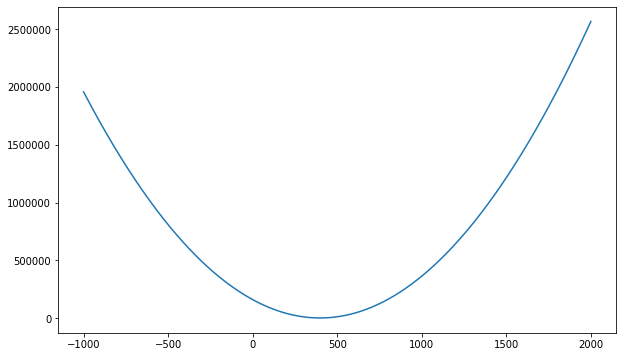

In [43]:
x = np.linspace(-1000, 2000, 10000)
plt.figure(figsize = (10,6))
plt.plot(x, mystery_func(x))
x[np.argmin(mystery_func(x))]